# Taller 2 AA Entragable 


Este taller se realizara utilizando el mismo conjunto de datos que le fue
asignado para el taller 1 y una de las siguientes tecnicas de aprendizaje a su
eleccion:

Dataset asignado : "allrep"

Tecnica de aprendizaje : "Maquinas de vectores de soporte"

## Preparacion de datos 


importamos todas las librerías necesarias para trabajar Aprendizaje Automático con Python y Sci-kit learn

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
import io
import requests
from sklearn.metrics import classification_report, confusion_matrix

importar los datos de entrenamiento y eliminar los valores faltantes,
ademas de convertir los valores categoricos a enteros. Se elimina la columna 27 porque no contiene valores .

In [2]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/allrep.data"
ds_ = pd.read_csv(url, header=None)
del ds_[27] # Se elimina la columna 27 que esta totalmente vacia 
ds = ds_.dropna()
ds = ds.rename(columns = {ds.columns.values[28]:'C'}) # Cambiamos el nombre de la última columna por "C" de clase
ds.C = ds.C.str.replace(r"\..*","") # Eliminanmos de la Clase los carateres numericos 
le = preprocessing.LabelEncoder() # Label encoder de sci-kit
ds = ds.apply(le.fit_transform) # Convertimos los valores de object a intds


importar los datos de test y eliminar los valores faltantes,
ademas de convertir los valores categoricos a enteros. Se elimina la columna 27 porque no contiene valores .


In [3]:
urltest = "https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/allrep.test"
test_ = pd.read_csv(urltest, header=None)
del test_[27]
test = test_.dropna()
test = test.rename(columns = {test.columns.values[28]:'C'}) # Cambiamos el nombre de la última columna por "C" de clases = test.apply(le.fit_transform) # Convertimos los valores de object a int
test.C = test.C.str.replace(r"\..*","") # Eliminanmos de la Clase los carateres numericos 
le = preprocessing.LabelEncoder() # Label encoder de sci-kit
test = test.apply(le.fit_transform) # Convertimos los valores de object a int
#test


Se realiza un histograma para ver la distribucion de las clases y la proporcion entre la clase [0] mayoritaria 
y las demas clase[1] , clase[2], clase[3]. 

Clase 0: 2713
Clase 1: 23
Clase 2: 29
Clase 3: 35
Proporcion: 117.96 : clase[0] / clase[1]
Proporcion: 93.55 : clase[0] / clase[2]
Proporcion: 77.51 : clase[0] / clase[3]


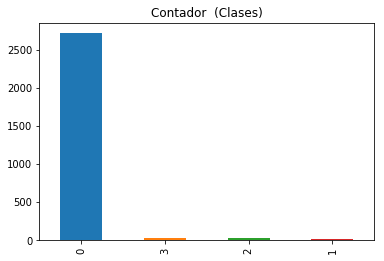

In [4]:
import numpy as np
import pandas as pd

target_count = ds['C'].value_counts() 
print('Clase 0:', target_count[0])
print('Clase 1:', target_count[1])
print('Clase 2:', target_count[2])
print('Clase 3:', target_count[3])
print('Proporcion:', round(target_count[0] / target_count[1]  , 2), ': clase[0] / clase[1]')
print('Proporcion:', round(target_count[0] / target_count[2]  , 2), ': clase[0] / clase[2]')
print('Proporcion:', round(target_count[0] / target_count[3]  , 2), ': clase[0] / clase[3]')
target_count.plot(kind='bar', title='Contador  (Clases)');

Se procede a extraer aleatoriamente un 10% de los datos del conjunto de entrenamiento. Este subconjunto constituira el conjunto de validación, que se usará para estimar los valores de los parámetros en las técnicas que así lo requieran. Todas las técnicas deberán entrenarse con el mismo conjunto de entrenamiento para que sea posible comparar sus desempeños. En la siguiente celda, se divide el conjunto de entrenamiento como se enunció.

In [4]:
x_train = ds.drop('C', axis = 1)
y_train = ds['C']

x_test = test.drop('C', axis = 1)
y_test = test['C']

from collections import Counter

x_strainval, x_stestval, y_strainval, y_stestval = train_test_split(x_train, y_train, test_size = 0.1, random_state=123)
print('Original dataset shape trainval {}'.format(Counter(y_strainval)))
print('Original dataset shape testval {}'.format(Counter(y_stestval)))

Original dataset shape trainval Counter({0: 2438, 3: 31, 2: 29, 1: 22})
Original dataset shape testval Counter({0: 275, 3: 4, 1: 1})


In [5]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

## Primera Iteracion "Seleccionar el mejor Costo para la SMV"

A continuación se estimará qué parámetro C es el que mejor se comporta con las SVM.

In [6]:

########################################################################
#################### Linear SVM C=10.0 ##################################

SVM10 = svm.LinearSVC(dual=False, C=10.0)
SVM10.fit(x_strainval, y_strainval)

SVM10_predict = SVM10.predict(x_stestval)

print("\n############## Accuracy Linear SVM C=10.0 ##################")
print(metrics.accuracy_score(y_stestval, SVM10_predict))
print(metrics.confusion_matrix(y_stestval, SVM10_predict))

########################################################################
#################### Linear SVM C=50.0 ##################################

SVM50 = svm.LinearSVC(dual=False, C=50.0)
SVM50.fit(x_strainval, y_strainval)

SVM50_predict = SVM50.predict(x_stestval)

print("\n############## Accuracy Linear SVM C=50.0 ##################")
print(metrics.accuracy_score(y_stestval, SVM50_predict))
print(metrics.confusion_matrix(y_stestval, SVM50_predict))

########################################################################
#################### Linear SVM C=500.0 ##################################

SVM50 = svm.LinearSVC(dual=False, C=500.0)
SVM50.fit(x_strainval, y_strainval)

SVM50_predict = SVM50.predict(x_stestval)

print("\n############## Accuracy Linear SVM C=500.0 ##################")
print(metrics.accuracy_score(y_stestval, SVM50_predict))
print(metrics.confusion_matrix(y_stestval, SVM50_predict))



############## Accuracy Linear SVM C=10.0 ##################
0.9785714285714285
[[274   1   0]
 [  1   0   0]
 [  4   0   0]]

############## Accuracy Linear SVM C=50.0 ##################
0.975
[[273   1   1]
 [  1   0   0]
 [  4   0   0]]

############## Accuracy Linear SVM C=500.0 ##################
0.975
[[273   1   1]
 [  1   0   0]
 [  4   0   0]]


## Segunda Iteracion "Seleccionar el Mejor Kernel para SVM"
El parámetro C no se pudo establer uno como mejor  rendimiento de la SVM Lineal. Ahora, se entrenarán 2 SVM con funciones kernel distintas para evaluar cuál parametro arroja los mejores resultados con la partición previa que se obtuvo.

In [46]:
########################################################################
########################### RBF SVM ####################################

SVMrbf = svm.SVC(kernel='rbf')
SVMrbf.fit(x_strainval, y_strainval)

SVMrbf_predict = SVMrbf.predict(x_stestval)

print("\n############## Accuracy SVM RBF ##################")
print(metrics.accuracy_score(y_stestval, SVMrbf_predict))
print(metrics.confusion_matrix(y_stestval, SVMrbf_predict))

########################################################################
########################## Sigmoid SVM #################################

SVMsigmoid = svm.SVC(kernel='sigmoid')
SVMsigmoid.fit(x_strainval, y_strainval)

SVMsigmoid_predict = SVMsigmoid.predict(x_stestval)

print("\n############## Accuracy SVM Sigmoid ##################")
print(metrics.accuracy_score(y_stestval, SVMsigmoid_predict))
print(metrics.confusion_matrix(y_stestval, SVMsigmoid_predict))


C:\Users\Juan Jose\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



############## Accuracy SVM RBF ##################
0.9821428571428571
[[275   0   0]
 [  1   0   0]
 [  4   0   0]]

############## Accuracy SVM Sigmoid ##################
0.9821428571428571
[[275   0   0]
 [  1   0   0]
 [  4   0   0]]


C:\Users\Juan Jose\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


La SVM con kernel lineal obtuvo un mejor accuracy y por tal razón sera usada para entrenar el clasificador y posteriormente evaluarlo con los datos originales de prueba. En la siguiente porción de codigo, entrenamos el clasificador y realizamos la respectiva predicción. Además, evaluamos el desempeño del clasificador teniendo en cuenta las métricas que provee el reporte de clasificación de sklearn.

In [8]:
########################################################################
#################### Linear SVM FINAL ##################################
x_train =ds.drop('C', axis = 1)
y_train = ds['C']
x_test =test.drop('C', axis = 1)
y_test = test['C']
SVM = svm.LinearSVC(dual=False,  C=10)
SVM.fit(x_train, y_train)
from sklearn.metrics import classification_report, confusion_matrix
SVM_predict = SVM.predict(x_test)

print("\n############## Accuracy Linear SVM FINAL ##################")
print(metrics.accuracy_score(y_test, SVM_predict))
print(metrics.confusion_matrix(y_test, SVM_predict))
print(classification_report(y_test,SVM_predict))


############## Accuracy Linear SVM FINAL ##################
0.9609053497942387
[[930   2   0   3]
 [ 10   1   0   0]
 [  8   1   0   0]
 [ 14   0   0   3]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       935
           1       0.25      0.09      0.13        11
           2       0.00      0.00      0.00         9
           3       0.50      0.18      0.26        17

   micro avg       0.96      0.96      0.96       972
   macro avg       0.43      0.32      0.34       972
weighted avg       0.94      0.96      0.95       972



C:\Users\Juan Jose\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Tercera Iteracion "Eliminar  atributos Innecesarios  "
Apesar que se obtuvo una buena predicion del clasificador "SVM LINEAL", se intera mejorar eliminando aquellos atributos que contengan alta correlacion para si se puede mejorar la predicion, a continuacion se grafica la matriz de correlacion para 
ver cuales atributos estan altamente correlacionados .

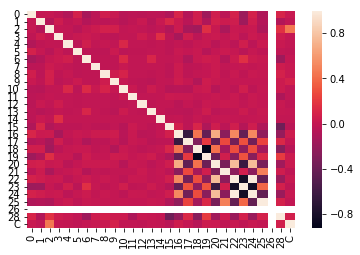

In [8]:
import seaborn as sns 
corr = ds.corr() 
sns.heatmap(corr, 
      xticklabels=corr.columns.values, 
      yticklabels=corr.columns.values) 

El matriz se identifico que el atributo 19 esta alta correlacion con los atributos 21,23,25 se procede a eliminarlo para ver si la prediccion mejora. se eliminan en los dos conjuntos en el entrenamiento y test 

In [9]:
del ds[21]
del ds[23]
del ds[25]
del ds[26]
del test[21]
del test[23]
del test[25]
del test[26]

Se procede a graficar nuevamente la matriz de correlacion para verificar la elimacion de los atributos en el conjunto de train

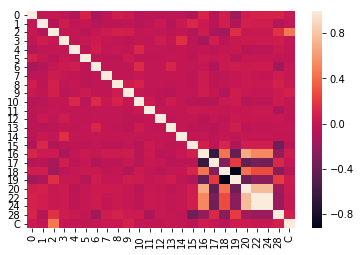

In [10]:
import seaborn as sns 
corr = ds.corr() 
sns.heatmap(corr, 
      xticklabels=corr.columns.values, 
      yticklabels=corr.columns.values) 

Se realiza nuevamente la predicion para ver si el modelo mejora con repecto al anterior, antes de eliminar las columnas que tenian alta correlacion 

In [11]:
########################################################################
#################### Linear SVM FINAL ##################################

SVM = svm.LinearSVC(dual=False,  C=10)
SVM.fit(x_train, y_train)
from sklearn.metrics import classification_report, confusion_matrix
SVM_predict = SVM.predict(x_test)

print("\n############## Accuracy Linear SVM FINAL ##################")
print(metrics.accuracy_score(y_test, SVM_predict))
print(metrics.confusion_matrix(y_test, SVM_predict))
print(classification_report(y_test,SVM_predict))



############## Accuracy Linear SVM FINAL ##################
0.9609053497942387
[[930   2   0   3]
 [ 10   1   0   0]
 [  8   1   0   0]
 [ 14   0   0   3]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       935
           1       0.25      0.09      0.13        11
           2       0.00      0.00      0.00         9
           3       0.50      0.18      0.26        17

   micro avg       0.96      0.96      0.96       972
   macro avg       0.43      0.32      0.34       972
weighted avg       0.94      0.96      0.95       972



C:\Users\Juan Jose\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Juan Jose\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Juan Jose\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Como se puede observar la predicion no mejora luego de eliminar los datos correlacionados es igual a la anterior prediccion.


## Cuarta Iteracion "Balanceo de Datos usando Oversampling"

Como se pudo observar en la etapa de preparacion de los datos, donde se evidencio que una de las clases "0" predominaba sobre la otras como se muestra a continuacion:


In [12]:
ds.C.value_counts()

0    2713
3      35
2      29
1      23
Name: C, dtype: int64

In [13]:
from sklearn.utils import resample
# separar las clases entre mayoritaria y minoritaria 
ds_majority = ds[ds.C ==0]
ds_minority1 = ds[ds.C ==1]
ds_minority2 = ds[ds.C ==2] 
ds_minority3 = ds[ds.C == 3]
# sobre muestrear las clases minoritarias
ds_minority_upsampled1 = resample(ds_minority1, 
                                 replace=True,     # Muestreo con remplazo
                                 n_samples=2713,    # cantidad de muestras a igualar 
                                 random_state=123) 

ds_minority_upsampled2 = resample(ds_minority2, 
                                 replace=True,     # Muestreo con remplazo
                                 n_samples=2713,    # cantidad de muestras a igualar
                                 random_state=123) 
ds_minority_upsampled3 = resample(ds_minority3, 
                                 replace=True,     # Muestreo con remplazo
                                 n_samples=2713,    # cantidad de muestras a igualar
                                 random_state=123) 

# concaternar la clase mayoritaria con la clases minoritarias creadas recientemente
ds_upsampled = pd.concat([ds_majority, ds_minority_upsampled1,ds_minority_upsampled2,ds_minority_upsampled3])
 
# imprimir el numero de muestras por clase
ds_upsampled.C.value_counts()


3    2713
2    2713
1    2713
0    2713
Name: C, dtype: int64

Se grafica nuevamente el histograma para mostrar la distribucion de las clases luego del oversampling y proporcion vs la clases anteriormente predominante

Clase 0: 2713
Clase 1: 2713
Clase 2: 2713
Clase 3: 2713
Proporcion: 1.0 : clase[0] / clase[1]
Proporcion: 1.0 : clase[0] / clase[2]
Proporcion: 1.0 : clase[0] / clase[3]


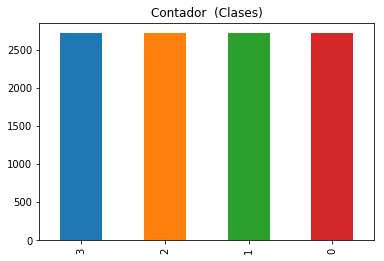

In [14]:
import numpy as np
import pandas as pd

target_count = ds_upsampled['C'].value_counts() 
print('Clase 0:', target_count[0])
print('Clase 1:', target_count[1])
print('Clase 2:', target_count[2])
print('Clase 3:', target_count[3])
print('Proporcion:', round(target_count[0] / target_count[1]  , 2), ': clase[0] / clase[1]')
print('Proporcion:', round(target_count[0] / target_count[2]  , 2), ': clase[0] / clase[2]')
print('Proporcion:', round(target_count[0] / target_count[3]  , 2), ': clase[0] / clase[3]')
target_count.plot(kind='bar', title='Contador  (Clases)');

In [15]:
########################################################################
#################### Linear SVM FINAL ##################################
x_train =ds_upsampled.drop('C', axis = 1)
y_train = ds_upsampled['C']
x_test =test.drop('C', axis = 1)
y_test = test['C']
SVM = svm.LinearSVC(dual=False , C=10 )
SVM.fit(x_train,y_train )

SVM_predict = SVM.predict(x_test)

print("\n############## Accuracy Linear SVM FINAL ##################")
print(metrics.accuracy_score(y_test, SVM_predict))
print(metrics.confusion_matrix(y_test, SVM_predict))
print(classification_report(y_test,SVM_predict))



############## Accuracy Linear SVM FINAL ##################
0.8960905349794238
[[839  22  29  45]
 [  0  10   1   0]
 [  1   3   5   0]
 [  0   0   0  17]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95       935
           1       0.29      0.91      0.43        11
           2       0.14      0.56      0.23         9
           3       0.27      1.00      0.43        17

   micro avg       0.90      0.90      0.90       972
   macro avg       0.43      0.84      0.51       972
weighted avg       0.97      0.90      0.92       972



In [ ]:
x_train =ds_upsampled.drop('C', axis = 1)
y_train = ds_upsampled['C']
x_test =test.drop('C', axis = 1)
y_test = test['C']



from sklearn.svm import SVC  
svclassifier = SVC(kernel='poly', degree=8)  
svclassifier.fit(x_train, y_train)
y_pred = svclassifier.predict(x_test)  
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

C:\Users\Juan Jose\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
Como se puede observar la precision del clasificador disminuyo a la mitad con el uso del oversampling

## Quinta Iteracion "Balanceo de Datos usando Undersampling"

In [32]:
ds.C.value_counts()

0    2713
3      35
2      29
1      23
Name: C, dtype: int64

In [33]:
from sklearn.utils import resample
# separar las clases entre mayoritaria y minoritaria 
ds_majority = ds[ds.C ==0]
ds_minorityd1 = ds[ds.C ==1]
ds_minorityd2 = ds[ds.C ==2] 
ds_minorityd3 = ds[ds.C == 3]
# sobre muestrear las clases minoritarias
ds_majority_downsampled = resample(ds_majority, 
                                 replace=False,     # Muestreo sin remplaso
                                 n_samples=23,    # cantidad de muestra a igualar
                                 random_state=123) 



# concaternar la clase mayoritaria con la clases minoritarias creadas recientemente
ds_downsampled = pd.concat([ds_majority_downsampled,ds_minorityd1, ds_minorityd2,ds_minorityd3 ])
 
# imprimir el numero de muestras por clase
ds_downsampled.C.value_counts()

3    35
2    29
1    23
0    23
Name: C, dtype: int64

Clase 0: 23
Clase 1: 23
Clase 2: 29
Clase 3: 35
Proporcion: 1.0 : clase[0] / clase[1]
Proporcion: 0.79 : clase[0] / clase[2]
Proporcion: 0.66 : clase[0] / clase[3]


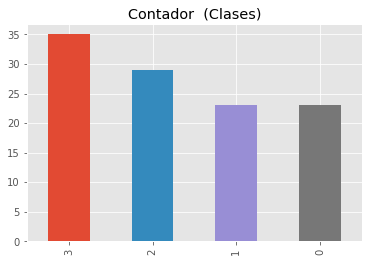

In [117]:
import numpy as np
import pandas as pd

target_count = ds_downsampled['C'].value_counts() 
print('Clase 0:', target_count[0])
print('Clase 1:', target_count[1])
print('Clase 2:', target_count[2])
print('Clase 3:', target_count[3])
print('Proporcion:', round(target_count[0] / target_count[1]  , 2), ': clase[0] / clase[1]')
print('Proporcion:', round(target_count[0] / target_count[2]  , 2), ': clase[0] / clase[2]')
print('Proporcion:', round(target_count[0] / target_count[3]  , 2), ': clase[0] / clase[3]')
target_count.plot(kind='bar', title='Contador  (Clases)');

In [34]:
x_train =ds_downsampled.drop('C', axis = 1)
y_train = ds_downsampled['C']

########################################################################
#################### Linear SVM FINAL ##################################

SVM = svm.LinearSVC(dual=False , C=1000 )
SVM.fit(x_train,y_train)

SVM_predict = SVM.predict(x_test)

print("\n############## Accuracy Linear SVM FINAL ##################")
print(metrics.accuracy_score(y_test, SVM_predict))
print(metrics.confusion_matrix(y_test, SVM_predict))
print(classification_report(y_test,SVM_predict))


############## Accuracy Linear SVM FINAL ##################
0.8909465020576132
[[837  20  35  43]
 [  1   8   2   0]
 [  1   3   5   0]
 [  0   0   1  16]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.94       935
           1       0.26      0.73      0.38        11
           2       0.12      0.56      0.19         9
           3       0.27      0.94      0.42        17

   micro avg       0.89      0.89      0.89       972
   macro avg       0.41      0.78      0.48       972
weighted avg       0.97      0.89      0.92       972



## Sexta Iteracion "Balanceo de datos usando Undersampling y Oversampling simultaneamente"

In [36]:
from sklearn.utils import resample
# separar las clases entre mayoritaria y minoritaria 
ds_majority = ds[ds.C ==0]
ds_minority1 = ds[ds.C ==1]
ds_minority2 = ds[ds.C ==2] 
ds_minority3 = ds[ds.C == 3]

# sobre muestrear las clases minoritarias
ds1_majority_downsampled = resample(ds_majority, 
                                 replace=False,     # Muestreo sin remplaso
                                 n_samples=35,    # cantidad de muestra a igualar
                                 random_state=123) 



# sobre muestrear las clases minoritarias
ds1_minority_upsampled1 = resample(ds_minority1, 
                                 replace=True,     # Muestreo con remplazo
                                 n_samples=35,    # cantidad de muestras a igualar 
                                 random_state=123) 

ds1_minority_upsampled2 = resample(ds_minority2, 
                                 replace=True,     # Muestreo con remplazo
                                 n_samples=35,    # cantidad de muestras a igualar
                                 random_state=123) 



ds1_minority_upsampled3 = resample(ds_minority3, 
                                 replace=True,     # Muestreo con remplazo
                                 n_samples=35,    # cantidad de muestras a igualar
                                 random_state=123) 




# concaternar la clase mayoritaria con la clases minoritarias creadas recientemente
ds_meclasampled = pd.concat([ds1_majority_downsampled, ds1_minority_upsampled1,ds1_minority_upsampled2,ds1_minority_upsampled3])
 
# imprimir el numero de muestras por clase
ds_meclasampled.C.value_counts()


3    35
2    35
1    35
0    35
Name: C, dtype: int64

Clase 0: 35
Clase 1: 35
Clase 2: 35
Clase 3: 35
Proporcion: 1.0 : clase[0] / clase[1]
Proporcion: 1.0 : clase[0] / clase[2]
Proporcion: 1.0 : clase[0] / clase[3]


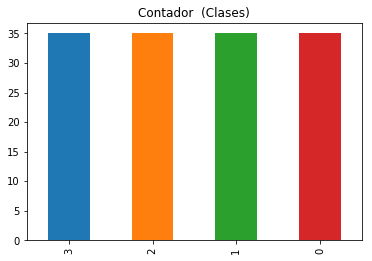

In [37]:
import numpy as np
import pandas as pd

target_count = ds_meclasampled['C'].value_counts() 
print('Clase 0:', target_count[0])
print('Clase 1:', target_count[1])
print('Clase 2:', target_count[2])
print('Clase 3:', target_count[3])
print('Proporcion:', round(target_count[0] / target_count[1]  , 2), ': clase[0] / clase[1]')
print('Proporcion:', round(target_count[0] / target_count[2]  , 2), ': clase[0] / clase[2]')
print('Proporcion:', round(target_count[0] / target_count[3]  , 2), ': clase[0] / clase[3]')
target_count.plot(kind='bar', title='Contador  (Clases)');

In [38]:
x_train =ds_meclasampled.drop('C', axis = 1)
y_train = ds_meclasampled['C']

########################################################################
#################### Linear SVM FINAL ##################################

SVM = svm.LinearSVC(dual=False , C=10 )
SVM.fit(x_train,y_train)

SVM_predict = SVM.predict(x_test)

print("\n############## Accuracy Linear SVM FINAL ##################")
print(metrics.accuracy_score(y_test, SVM_predict))
print(metrics.confusion_matrix(y_test, SVM_predict))
print(classification_report(y_test,SVM_predict))


############## Accuracy Linear SVM FINAL ##################
0.8816872427983539
[[830  31  28  46]
 [  1   8   2   0]
 [  1   5   3   0]
 [  0   0   1  16]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94       935
           1       0.18      0.73      0.29        11
           2       0.09      0.33      0.14         9
           3       0.26      0.94      0.41        17

   micro avg       0.88      0.88      0.88       972
   macro avg       0.38      0.72      0.44       972
weighted avg       0.97      0.88      0.92       972



In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# Take the first two features. We could avoid this by using a two-dim dataset

X =  x_stestval[['campaign','previous']]

y= y_stestval


# Creamos una instancia de SVM y ajustamos los datos. No escalamos nuestro
# datos ya que queremos trazar los vectores de soporte
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C))#,
          #svm.SVC(kernel='rbf', gamma=0.7, C=C),
          #svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)'),
          #'SVC with RBF kernel',
          #'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X['campaign'], X['c']
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('campaign')
    ax.set_ylabel('previous')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()